# Import libraries

In [366]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn
%matplotlib inline
from mpl_toolkits import mplot3d

# Parameters

In [367]:
k1 = 10       #Number of particles in the high-level PSO
k2 = 50       #Number of particles in the low-level PSO

In [368]:
w1 = 1       #inertia weight in the high-level PSO
C1 = 1       #cognitive factor 1 in the high-level PSO
C2 = 1       #cognitive factor 2 in the high-level PSO
global_optimum = -959.6407   #Globally optimal value given in the question paper

# Functions

In [369]:
def velocity(v_old, x_old, pix, pgxl, w, C1, C2):  #A function determining the new velocity of the particles
    
    ρ1 = random.random()     #random variables in the range [0, 1]
    ρ2 = random.random()
    
    v_next = w * v_old + ρ1*C1*(pix - x_old) + ρ2*C2*(pgxl - x_old)   #The calculation given for calculating the inertia weight

    v = min(v_next, 256)       #Velocity clamping the new velocity of the particle
        
    return v

In [370]:
def move(v_new, x_old):     #A function determining the new position of the particles
    
    x_new = x_old + v_new   #The old position plus the current velocity of the particle
    
    if x_new > 512:         #ensure that the position of the particle is not larger than the specified limits
        
        x_new = 512
        
    if x_new < -512:        #ensure that the position of the particle is not smaller than the specified limits
        
        x_new = -512
    
    return x_new

In [371]:
def moveh(v_new, x_old):     #A function determining the new position of the high-level particles
    
    x_new = x_old + v_new    #The old position plus the current velocity of the particle
    
    if x_new > 1:            #ensure that the position of the particle is not larger than the specified limits
        
        x_new = 1
        
    if x_new < 0:            #ensure that the position of the particle is not smaller than the specified limits
        
        x_new = 0
    
    return x_new

In [372]:
def minimise(x, y):     #A function determining the objective function of a particle based on it's position
    
    f = -1 * (y + 47) * np.sin(np.sqrt(np.abs(y + (x/2) + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    
    return f

In [373]:
def inertia(Φ1, Φ2):  
    
#A function determining the new inertia weight of a particle using a random adjustment method
    
    r1 = random.random()
    r2 = random.random()
    
    w = Φ1 * r1 + Φ2 *r2
    
    return w

In [374]:
def mean_error(objective_function):
    
    #A function determining the mean_error of the objective functions of the particles versus the global optimal 
    
    diff = []
    
    for i in range(len(objective_function)):
        
        diff1 = objective_function[i] - global_optimum
        diff2 = diff1**2
        
        diff.append(diff2)
        
    error = (1 / len(objective_function)) + sum(diff)
    
    return error

# Plot Graph

# Low-level PSO

In [375]:
def subswarm(w, C1, C2):  #This is the lower level PSO
    
    c = 0                 #initialise the number of non-improving solutions
    error = []
    
    xl = np.array([0, 0])
    vl = np.array([0, 0])

    for i in range(k2):

        x1 = random.uniform(-512, 512)   #initialise the x position of the particle between the maximum and minimum values
        y1 = random.uniform(-512, 512)   #initialise the y position of the particle between the maximum and minimum values

        xl_new = np.array([x1, y1])
        vl_new = np.array([0, 0])     #initialise the velocity of the particles to 0

        xl = np.vstack([xl, xl_new]) 
        vl = np.vstack([vl, vl_new])

    xl = xl[1:]
    vl = vl[1:]

    pgxl = xl[0]
    pgl = minimise(xl[0][0], xl[0][1])

    pixl = xl                                       #initialise the corresponding x and y values of the pi values
    pil = []

    for i in range(len(xl)):
        
        pil.append(minimise(xl[i][0], xl[i][1]))    
        
        #initialise the pi values of all of the initial values based on the objective function values

    for i in range(len(xl)):

        fl = minimise(xl[i][0], xl[i][1])

        if fl < pgl:
            pgl = fl                                #find the pg (best) value of all of the initial values 
            pgxl = xl[i]                            #find the corresponding x and y values of pg 

    while c < 15:                                   #while there are less than 15 non-improving solutions (stopping criterion)

        vl_new = np.array([0, 0])

        for i in range(len(xl)):

            vxl = velocity(vl[i][0], xl[i][0], pixl[i][0],pgxl[0], w, C1, C2)   #find the next velocity of the particle 
            vyl = velocity(vl[i][1], xl[i][1], pixl[i][1],pgxl[1], w, C1, C2)

            vell = np.array([vxl, vyl])
            vl_new = np.vstack([vl_new, vell])

        vl_new = vl_new[1:]
        xl_new = np.array([0, 0])

        for i in range(len(xl)):

            x1l = move(vl_new[i][0], xl[i][0])   #find the next position of the particle 
            x2l = move(vl_new[i][1], xl[i][1])

            xil = np.array([x1l, x2l])
            xl_new = np.vstack([xl_new, xil])

        xl_new = xl_new[1:]
        fl = []
        
        pgl_old = pgl

        for i in range(len(xl)):

            f1l = minimise(xl_new[i][0], xl_new[i][1])  #find the objective function from the new position of the particle
            fl.append(f1l)

            if f1l < pil[i]:    
                
#if the new objective function value is smaller than the objective function in pi, the new objective function takes the place in
#the pi list and the position is updated 
                
                pixl[i] = xl_new[i]
                pil[i] = f1l

            if f1l < pgl:
                
#if the new objective function value is smaller than the pg objective function, the new objective function takes the place of pg
#and the position is updated
                
                pgl_old = pgl
                pgl = f1l
                pgxl = xl_new[i] 
            
        if pgl == pgl_old:  #if the pg value is the same as the previous run, update the number of non-improving runs
            c = c + 1
            
        else:              #if the pg value is the different to the previous run, reset the number of non-improving runs to 0
            c = 0

        xl = xl_new
        vl = vl_new
        
        error = mean_error(fl)  

    #calculate the error of the population by subtraction the global optimum from pg (best) of the population
    
    objective_function_values = xl
        
    return error, pgl, pgxl, objective_function_values 

In [376]:
subswarm(0.64895, 0.25479, 1)

(1498469.1550875322,
 -786.5259940788701,
 array([-456.8858068 , -382.62337357]),
 array([[-456.88580684, -382.62336995],
        [-456.88580702, -382.62337357],
        [-456.88580677, -382.62337372],
        [-456.88580775, -382.62337361],
        [-456.88580678, -382.62337271],
        [-456.8858068 , -382.62337325],
        [-456.8858068 , -382.62337376],
        [-456.8858068 , -382.62337364],
        [-456.88581556, -382.62337324],
        [-456.88580683, -382.62337359],
        [-456.88580669, -382.62330794],
        [-456.88580689, -382.62336617],
        [-456.88580653, -382.62337355],
        [-456.8858065 , -382.62335837],
        [-456.88580706, -382.62337361],
        [-456.88580686, -382.6233264 ],
        [-456.88580638, -382.62337394],
        [-456.8858068 , -382.6233734 ],
        [-456.88580698, -382.62337362],
        [-456.8858063 , -382.62337232],
        [-456.8858075 , -382.6233737 ],
        [-456.88580611, -382.62337508],
        [-456.88580416, -382.62337333]

# Starting population

In [377]:
#initialise the population for the superswarm (high-level PSO)

Φ = np.array([0, 0])
wh = []
vh = np.array([0, 0])

for i in range(k1):
    
    Φ1 = random.uniform(0, 1)  #initialise the cognative factors between [0, 1]
    Φ2 = random.uniform(0, 1)
    
    wh.append(inertia(Φ1, Φ2)) #calculate the inertia value based on the initialised cognative factors
    
    Φ_new = np.array([Φ1, Φ2])
    vh_new = np.array([0, 0])  #initialise the velocities of the cognative factors
    
    Φ = np.vstack([Φ, Φ_new]) 
    vh = np.vstack([vh, vh_new])
    
Φ = Φ[1:]
vh = vh[1:]
print(Φ, wh, vh)

[[0.07356307 0.8211288 ]
 [0.3589884  0.1242553 ]
 [0.15146186 0.29141092]
 [0.22373253 0.87718645]
 [0.61398739 0.43987759]
 [0.16417517 0.998879  ]
 [0.36872581 0.56013695]
 [0.70902221 0.16160732]
 [0.51995158 0.03666685]
 [0.32608991 0.26792898]] [0.31320689797853823, 0.36642812314106593, 0.0910826612737019, 0.6145910177305185, 0.34525933072165055, 0.6112045524415557, 0.39875673901931113, 0.5843563431515603, 0.13635569108299608, 0.34176920436118374] [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# High-level PSO

In [378]:
#superswarm 

pgxh = Φ[0]
pgw = wh[0]
pgh = 900000
subswarm_error = []
subswarm_pgxl = []
subswarm_pgl = []
objective_function = []

t = 0                 #initialise the number of non-improving solutions

pixh = Φ

for i in range(len(Φ)):  #This is the high-level PSO which is initialise in the code above
    
    fh = subswarm(wh[i], Φ[i][0], Φ[i][1])                 
    
    #calculate the fitness value of the initial population based on the output of the subswarm
    
    subswarm_error.append(fh[0])     #find the fitness value of the superswarm 
    subswarm_pgl.append(fh[1])          #find the maximum fitness values of the subswarm
    subswarm_pgxl.append(fh[2])         #find the particle position corresponding to the maximum fitness values of the subswarm
    objective_function.append(fh[3])    
    
for i in range(len(Φ)):
    
    if subswarm_error[i] < pgh:
        pgh = subswarm_error[i]   #find the pg value of the superswarm based on the initial population
        pgxh = Φ[i]               #find the position of the pg value of the superswarm based on the initial population
        pgw = wh[i]               #find the inertia of the pg value of the superswarm based on the initial population
        pgl = subswarm_pgl[i]     #find the maximum fitness values of the subswarm based on the pg value
        pgxl = subswarm_pgxl[i]     #find the position of the maximum fitness values of the subswarm based on the pg value
        obj = objective_function[i]
        
pih = subswarm_error   #initialise the pi values of the superswarm based on the initial population

while t < 10:               #while there are less than 10 non-improving solutions (stopping criterion)
    
    vh_new = np.array([0, 0])

    for i in range(len(Φ)):

        vxh = velocity(vh[i][0], Φ[i][0], pixh[i][0],pgxh[0], w1, C1, C2)   #find the next velocity of the particle
        vyh = velocity(vh[i][1], Φ[i][0], pixh[i][1],pgxh[1], w1, C1, C2)

        velh = np.array([vxh, vyh])
        vh_new = np.vstack([vh_new, velh])

    vh_new = vh_new[1:]
    Φ_new = np.array([0, 0])

    for i in range(len(Φ)):

        Φ1 = moveh(vh_new[i][0], Φ[i][0])      #find the next position of the particle
        Φ2 = moveh(vh_new[i][1], Φ[i][1])

        Φh = np.array([Φ1, Φ2])
        Φ_new = np.vstack([Φ_new, Φh])

    Φ_new = Φ_new[1:]
    wh_new = []

    for i in range(len(Φ)):

        wh_new.append(inertia(Φ_new[i][0], Φ_new[i][1]))   #find the next inertia of the particle based on the next position

    pgh_old = pgh

    subswarm_error_new = []
    subswarm_pgxl_new = []
    subswarm_pgl_new = []
    objective_function = []

    for i in range(len(Φ)):

        fh = subswarm(wh_new[i], Φ_new[i][0], Φ_new[i][1])
        
        #calculate the fitness value of the superswarm based on the output of the subswarm

        subswarm_error_new.append(fh[0])
        subswarm_pgl_new.append(fh[1])
        subswarm_pgxl_new.append(fh[2])
        objective_function.append(fh[3])

    for i in range(len(Φ)):

        if  subswarm_error_new[i] < pih[i]:
            
#if the new objective function value is smaller than the objective function in pi, the new objective function takes the place in
#the pi list and the position is updated
            
            pixh[i] = Φ[i]                      #update the position of the pi values of the superswarm
            pih[i] = subswarm_error_new[i]      #update the pi values of the superswarm

        if subswarm_error_new[i] < pgh:
            
#if the new objective function value is smaller than the pg objective function, the new objective function takes the place of pg
#and the position is updated

            pgh_old = pgh
            pgh = subswarm_error_new[i]      #update the pg value of the superswarm
            pgxh = Φ_new[i]                  #update the position of the pg value of the superswarm
            pgw = wh_new[i]                  #update the inertia of the pg value of the superswarm 
            pgl = subswarm_pgl_new[i]        #update the maximum fitness values of the subswarm based on the pg value
            pgxl = subswarm_pgxl_new[i] #update the position of the maximum fitness values of the subswarm based on the pg value
            obj = objective_function[i]      #update the objective functions of the particles at the pg value

    if pgh == pgh_old:  #if the pg value is the same as the previous run, update the number of non-improving runs 
        t = t + 1

    else:               #if the pg value is the different to the previous run, reset the number of non-improving runs to 0
        t = 0
    print(t)

    Φ = Φ_new
    vh = vh_new
    wh = wh_new
    
    print(pgh, pgxh, pgw)
    print(pgl, pgxl)
print(obj)

0
29531.199085486227 [0.15559046 1.        ] 0.6171129028394552
-935.3379515605804 [439.48099744 453.97743493]
1
29531.199085486227 [0.15559046 1.        ] 0.6171129028394552
-935.3379515605804 [439.48099744 453.97743493]
0
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
1
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
2
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
3
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
4
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
5
0.020000078818431334 [0.15371781 1.        ] 0.7326823067722535
-959.6406627208507 [512.         404.23180487]
0
0.02000006948779614 [0.19564957 1.        ] 0.571473054901888
-959.640662720851 [512.         404.

[512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512.
 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512.
 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512. 512.
 512. 512. 512. 512. 512. 512. 512. 512.]
[404.23180516 404.2318051  404.23180347 404.23180473 404.23180533
 404.23180504 404.23180497 404.23180676 404.23180465 404.23180515
 404.2318049  404.23180517 404.2318052  404.23180551 404.23180519
 404.23180518 404.2318055  404.231748   404.2317405  404.23180503
 404.23180517 404.23180468 404.23180513 404.23180524 404.23180514
 404.2318051  404.23180476 404.23181337 404.23180517 404.23180539
 404.23180542 404.23180427 404.23180516 404.23180521 404.23187437
 404.23180518 404.23180864 404.23180551 404.23180536 404.2318052
 404.23180509 404.23180512 404.23180524 404.23180433 404.23180747
 404.23180518 404.23180572 404.23181079 404.23180516 404.23180511]


Text(0.5, 0, 'f(x, y)')

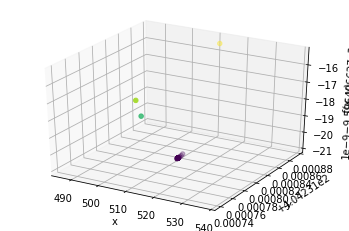

In [379]:
x = obj[:,0]
y = obj[:,1]

print(x)
print(y)

#x, y = np.meshgrid(x, y)
z = minimise(x, y)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c = z)#, linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

#plt.savefig('Function4.png', transparent=True)

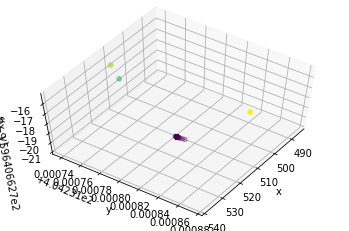

In [380]:
ax.view_init(60, 35)
#plt.savefig('Function4.png', transparent=True)
fig2


# Local Search

In [381]:
low_level = subswarm(0.64895, 0.25479, 1)
low_level


(1996250.915331337,
 -821.1964610613824,
 array([-313.97224839,  512.        ]),
 array([[-314.03601299,  512.        ],
        [-313.94217891,  512.        ],
        [-313.9913261 ,  512.        ],
        [-313.89355036,  512.        ],
        [-313.75676726,  512.        ],
        [-314.09557413,  512.        ],
        [-314.60060667,  512.        ],
        [-314.02890662,  512.        ],
        [-314.03342679,  512.        ],
        [-313.92600189,  512.        ],
        [-313.38385442,  512.        ],
        [-313.87434696,  512.        ],
        [-313.77641453,  512.        ],
        [-313.91035998,  512.        ],
        [-313.87682322,  512.        ],
        [-306.23976342,  512.        ],
        [-313.97591512,  512.        ],
        [-314.81522207,  512.        ],
        [-313.68400871,  512.        ],
        [-314.31532821,  512.        ],
        [-314.01462751,  512.        ],
        [-311.24194985,  512.        ],
        [-314.00290452,  512.        ],

In [382]:
def neighbourhood(x, y):
    
    # the neighbourhood of the point is the 8 extreme surrounding points from the current point
    
    x1 = max(min(x + random.random(), 512), -512)   #The point is moved a random distance away with the maximum radius being 1
    x2 = max(min(x - random.random(), 512), -512)   #The point needs to be in the specified search space
    y1 = max(min(y + random.random(), 512), -512)
    y2 = max(min(y - random.random(), 512), -512)
    
    return [x, y1], [x, y2], [x1, y], [x2, y], [x1, y1], [x2, y2], [x1, y2], [x2, y1] 
#The neighbourhood is a combination of all the directions

In [383]:
neighbourhood(512, 401.2318)
minimise(512, 401.2318)

-949.6358955435805

In [384]:
low_level = subswarm(0.64895, 0.25479, 0.98709)     #generate a population of particles based on the optimal hyper-parameters

particle1 = []

while len(particle1) < 5:                     #create a set of five particles that are not globally optimal
    
    index = random.randint(0, 49)             #chose a random integer between 0 and 49
    particle_i = low_level[3][index]          #select the particle that is associated with the respective random integer
    
    if minimise(particle_i[0], particle_i[1]) > -959.5:  
        #check that the particle is not significantly close to the global optimal
    
        particle1.append(particle_i)  
        #if the particle is not significantly close then add it to the list of not fully optimal particles
        
optimal = minimise(particle1[0][0], particle1[0][1])
x_optimal = particle1[0]

for i in range(len(particle1)):  #loop the local search through each of the five particles as a multiple-start local search

    done = 0
    solutionsChecked = 0      #varaible to record the number of solutions evaluated

    particle = particle1[i]

    f_best = minimise(particle[0], particle[1])
    f_current = f_best
    x_current = particle
    x_best = x_current

    while done == 0:     #while the solution is still improving

        solutionsChecked = solutionsChecked + 1

        neighbour = neighbourhood(x_current[0], x_current[1]) 
        #generate all the extreme neighbouring values of the particle position

        z = []

        for i in range(len(neighbour)):
            ans = minimise(neighbour[i][0], neighbour[i][1]) 
            #evaluate and return the objective function for each of the neighbours
            z.append(ans)

        for i in range(len(neighbour)):

            if(z[i] < f_best):              

        #if the objective function of the neighbour is better than that of the previous value, update the best position

                x_best = neighbour[i]
                f_best = minimise(neighbour[i][0], neighbour[i][1])

        if f_best == f_current:         #if there were no improving solutions in the neighborhood then the loop terminates
            done = done + 1
        else:
            x_current = x_best          #else: move to the neighbor solution and continue
            f_current = f_best

        print ("\nTotal number of solutions checked: ", solutionsChecked)
        print ("Best value found so far: ", f_best) 
        print ("Best solution found so far: ", x_best)
        
    if f_best < optimal:     #find the best solution out of all of the paarticles 
        optimal = f_best
        x_optimal = x_best

    print ("\nFinal number of solutions checked: ", solutionsChecked)
    print ("Best value found: ", f_best)
    print ("Weight is: ", f_best)
    print ("Best solution: ", x_best)
    print ("Optimal solution:", optimal, x_optimal)


Total number of solutions checked:  1
Best value found so far:  -957.0174415490387
Best solution found so far:  [512.0, 402.70453067778385]

Total number of solutions checked:  2
Best value found so far:  -958.6548887125634
Best solution found so far:  [512.0, 403.2975957650932]

Total number of solutions checked:  3
Best value found so far:  -959.4678240013379
Best solution found so far:  [512.0, 403.84137199639883]

Total number of solutions checked:  4
Best value found so far:  -959.6308538162781
Best solution found so far:  [512.0, 404.3246651282046]

Total number of solutions checked:  5
Best value found so far:  -959.6308538162781
Best solution found so far:  [512.0, 404.3246651282046]

Final number of solutions checked:  5
Best value found:  -959.6308538162781
Weight is:  -959.6308538162781
Best solution:  [512.0, 404.3246651282046]
Optimal solution: -959.6308538162781 [512.0, 404.3246651282046]

Total number of solutions checked:  1
Best value found so far:  94.56898115157003
